# Simple Linear Regression

## OLS

In [1]:
# --- Метод найменших квадратів (OLS) вручну ---
# Моделювання вартості піци за її розміром

# 1. Вихідні дані
size <- c(20, 25, 30, 35, 40, 50)
price <- c(97, 100, 170, 190, 200, 300)
pizza <- data.frame(size, price)
pizza

  size price
1   20    97
2   25   100
3   30   170
4   35   190
5   40   200
6   50   300

In [4]:
# 2. Обчислення середніх значень
size_mean <- mean(pizza$size)
price_mean <- mean(pizza$price)

cat("x: ", size_mean, "; y: ", price_mean)

x:  33.33333 ; y:  176.1667

In [6]:
# 3. Розрахунок коефіцієнтів β1 (нахил) і β0 (перетин)
b1 <- sum((pizza$size - size_mean) * (pizza$price - price_mean)) / sum((pizza$size - size_mean)^2)
b0 <- price_mean - b1 * x_mean
cat("price = ", b0, " + ", b1, "*size")

price =  -49.92857  +  6.782857 *size

In [8]:
pizza$predicted <- round(b0 + b1 * pizza$size,2)
pizza$error <- pizza$price - pizza$predicted
print(pizza)

  size price predicted  error
1   20    97     85.73  11.27
2   25   100    119.64 -19.64
3   30   170    153.56  16.44
4   35   190    187.47   2.53
5   40   200    221.39 -21.39
6   50   300    289.21  10.79


In [9]:
# 5. Прогноз для нової піци (наприклад, 45 см)
new_size <- 60
predicted_price <- b0 + b1 * new_size
cat("\nПрогнозована ціна для піци 45 см =", round(predicted_price, 2), "грн\n\n")


Прогнозована ціна для піци 45 см = 357.04 грн



In [10]:
# 6. Обчислення показників якості моделі
SST <- sum((pizza$price - y_mean)^2)
SSR <- sum((pizza$predicted - y_mean)^2)
SSE <- sum((pizza$price - pizza$predicted)^2)
R2 <- SSR / SST

cat("R² =", round(R2, 4), "\n")
cat("Сума квадратів помилок (SSE) =", round(SSE, 2), "\n\n")

R² = 0.9516 
Сума квадратів помилок (SSE) = 1363.37 



Warning message:
Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated. 


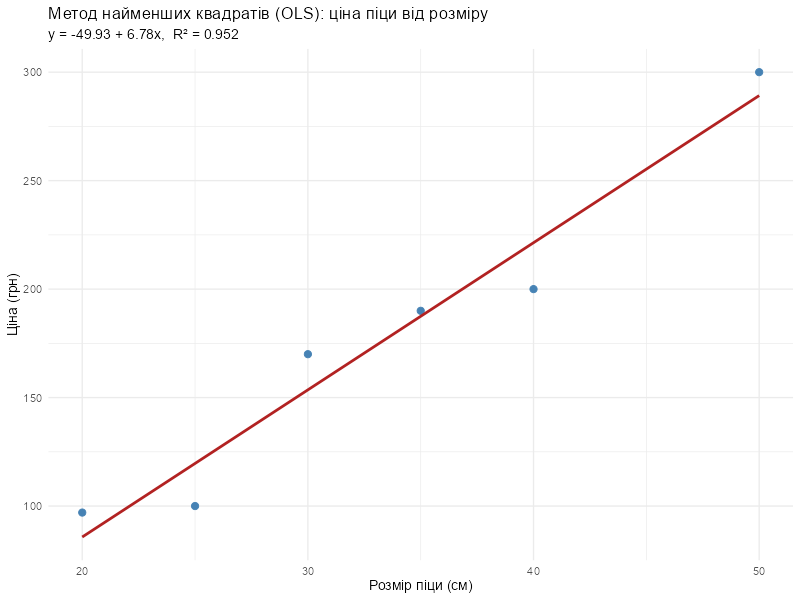

In [11]:
# 7. Візуалізація
library(ggplot2)
ggplot(pizza, aes(x = size, y = price)) +
  geom_point(color = "steelblue", size = 3) +
  geom_line(aes(y = predicted), color = "firebrick", size = 1.3) +
  labs(
    title = "Метод найменших квадратів (OLS): ціна піци від розміру",
    subtitle = paste0("y = ", round(b0, 2), " + ", round(b1, 2), "x,  R² = ", round(R2, 3)),
    x = "Розмір піци (см)",
    y = "Ціна (грн)"
  ) +
  theme_minimal(base_size = 14)

## `lm()`

In [12]:
# 1. Вихідні дані
size <- c(20, 25, 30, 35, 40, 50)
price <- c(97, 100, 170, 190, 200, 300)
pizza <- data.frame(size, price)
pizza

  size price
1   20    97
2   25   100
3   30   170
4   35   190
5   40   200
6   50   300

In [14]:
model <- lm(price ~ size, data = pizza)
model


Call:
lm(formula = price ~ size, data = pizza)

Coefficients:
(Intercept)         size  
    -49.929        6.783  


In [15]:
summary(model)


Call:
lm(formula = price ~ size, data = pizza)

Residuals:
      1       2       3       4       5       6 
 11.271 -19.643  16.443   2.529 -21.386  10.786 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -49.9286    26.5708  -1.879 0.133424    
size          6.7829     0.7644   8.874 0.000891 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.46 on 4 degrees of freedom
Multiple R-squared:  0.9517,	Adjusted R-squared:  0.9396 
F-statistic: 78.74 on 1 and 4 DF,  p-value: 0.0008909


In [20]:
model$coefficients[1]

(Intercept) 
  -49.92857 

In [21]:
model$fitted.values

        1         2         3         4         5         6 
 85.72857 119.64286 153.55714 187.47143 221.38571 289.21429 

In [22]:
library(modelr)

In [23]:
rsquare(model, pizza)

[1] 0.9516564

In [24]:
mse(model, pizza)

[1] 227.2214

In [25]:
df_predict = data.frame(size = seq(60, 100, 10))
df_predict

  size
1   60
2   70
3   80
4   90
5  100

In [26]:
df_predict$predicted_price = predict(model, df_predict)
df_predict

  size predicted_price
1   60        357.0429
2   70        424.8714
3   80        492.7000
4   90        560.5286
5  100        628.3571